In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

print('sklearn: {}'. format(sklearn. __version__))

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

sklearn: 1.3.2


In [41]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [42]:
# linear regression model

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

In [47]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.49678459 0.67448893 0.43130323 0.2457777  0.34250375 0.73392819
 0.33532951 1.09438331 0.74301361 0.94669791 0.89648226 0.6836403
 0.43525779 0.59483518 0.59931631]

R^2 Train: [0.83974691 0.75450812 0.86718915 0.89360273 0.89768372 0.75917041
 0.87761697 0.58546087 0.68879011 0.75895661 0.67839201 0.78297133
 0.88515626 0.79110266 0.77741442]

Average Mean Squared Error Train: 0.6169161713313767
Average R^2 Train: 0.7891841512903544

Mean Squared Error Test: [1.20139413 0.28616507 0.66000413 0.31142313 0.48962176 0.44849378
 0.56005969 0.54883205 0.17886207 1.14531541 0.2335414  0.33098829
 1.25312585 0.24955744 0.783476  ]

R^2 Test: [0.71665233 0.93496248 0.72499828 0.80536054 0.52920985 0.83011599
 0.82498135 0.78561248 0.90279236 0.61306912 0.90877289 0.79313232
 0.66672185 0.94114211 0.57419782]

Average Mean Squared Error Test: 0.578724012946886
Average R^2 Test: 0.7701147848844716


     Sleep Duration  Sleep Quality
19              7.6              7
195             6.5              6
198             6.5              6
233             6.3              6
205             7.7              8
..              ...            ...
79              6.0              6
26              7.8              7
318             8.4              9
213             7.8              8
76              6.0              6

[299 rows x 2 columns]


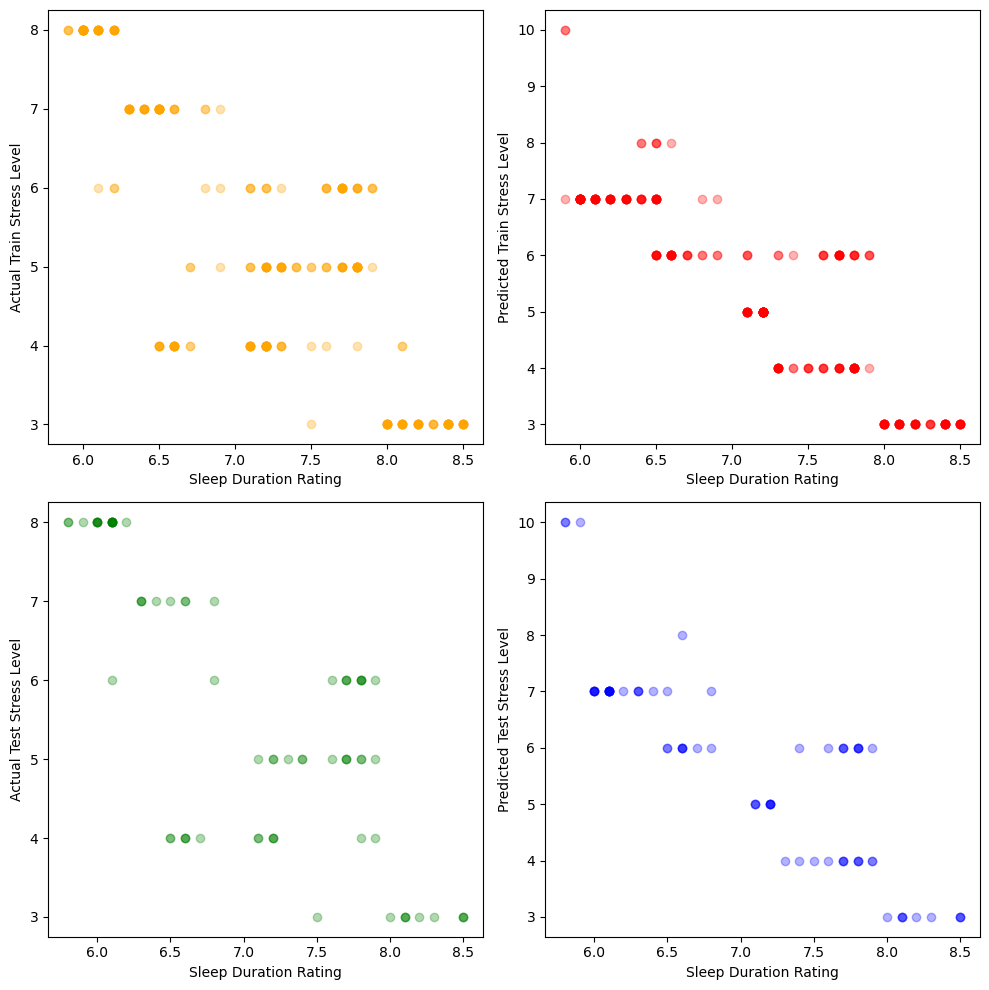

In [44]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

In [45]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1500, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:\n',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:\n',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("MLR Confusion Matrix for Training Data")
plt.title("MLR Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("MLR Confusion Matrix for Testing Data")
plt.title("MLR Confusion Matrix for Testing Data")
plt.show()

KeyboardInterrupt: 

NB Classification Train Report:
               precision    recall  f1-score   support

           3       0.96      0.96      0.96        53
           4       0.62      0.25      0.36        60
           5       0.54      0.89      0.67        54
           6       0.87      0.72      0.79        36
           7       0.81      0.90      0.85        39
           8       0.95      1.00      0.97        57

    accuracy                           0.78       299
   macro avg       0.79      0.79      0.77       299
weighted avg       0.79      0.78      0.76       299

Train Accuracy: 0.7759197324414716

NB Classification Test Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        18
           4       0.50      0.20      0.29        10
           5       0.60      0.92      0.73        13
           6       1.00      0.90      0.95        10
           7       1.00      0.91      0.95        11
           8       0.93      1.

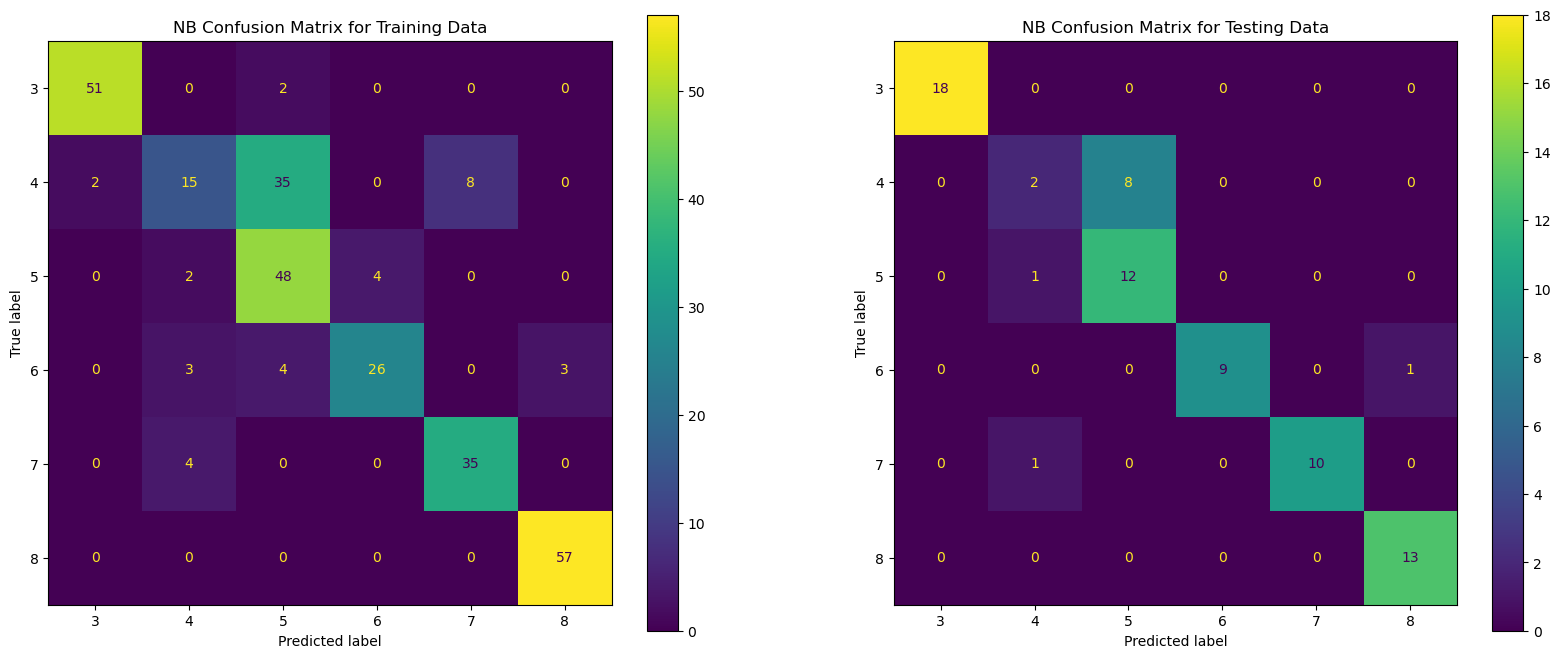

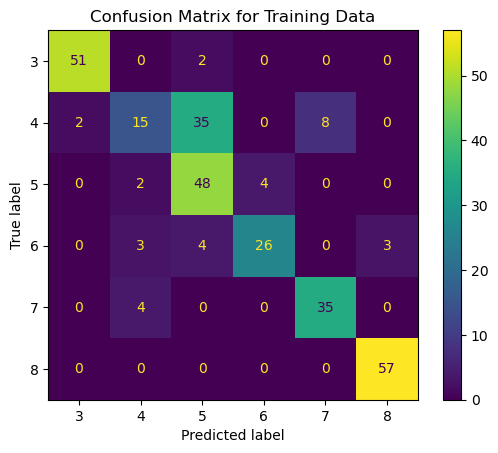

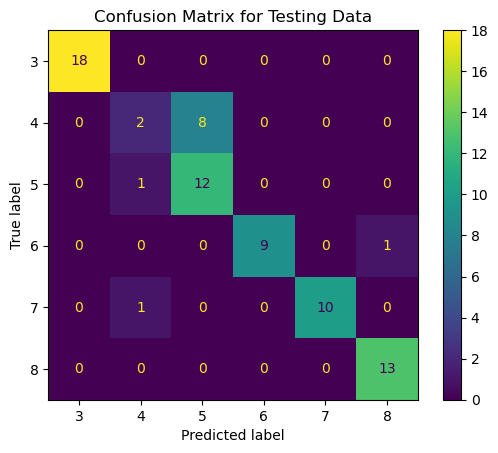

In [ ]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:\n',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:\n',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("NB Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("NB Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.97      0.97        59
           4       0.60      0.91      0.72        55
           5       0.85      0.54      0.66        54
           6       0.90      0.79      0.84        33
           7       1.00      0.87      0.93        39
           8       0.98      1.00      0.99        59

    accuracy                           0.85       299
   macro avg       0.88      0.85      0.85       299
weighted avg       0.88      0.85      0.85       299

Accuracy Train: 0.8528428093645485

SVM Classification Test Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.68      0.87      0.76        15
           5       0.82      0.69      0.75        13
           6       0.90      0.69      0.78        13
           7       1.00      0.82      0.90        11
           8       0.79      1.

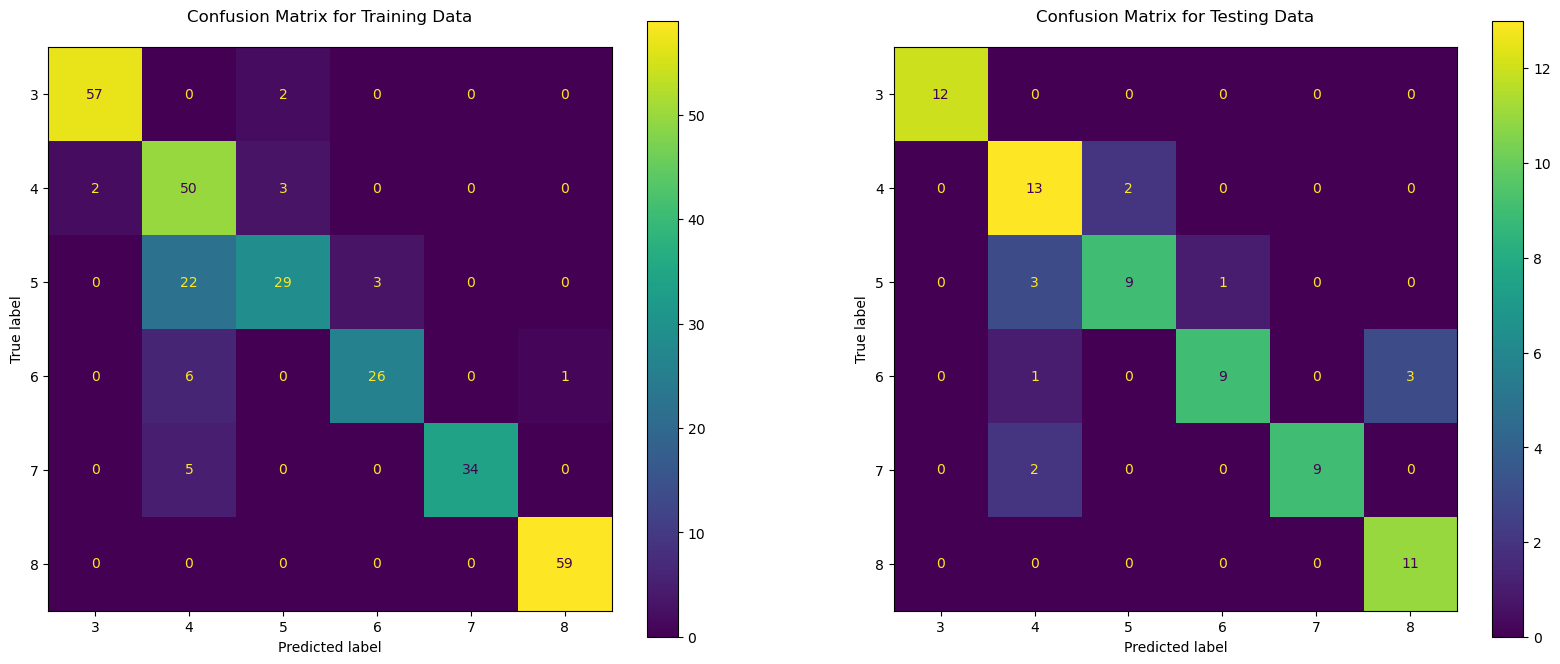

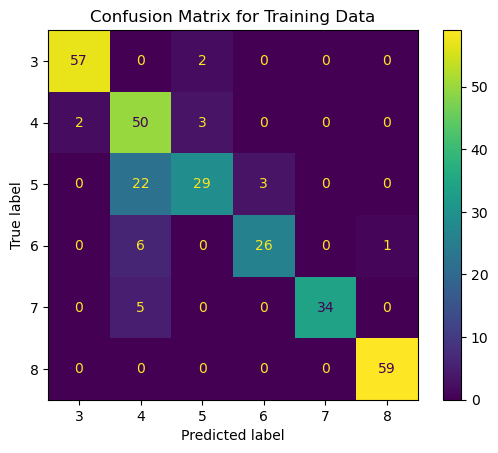

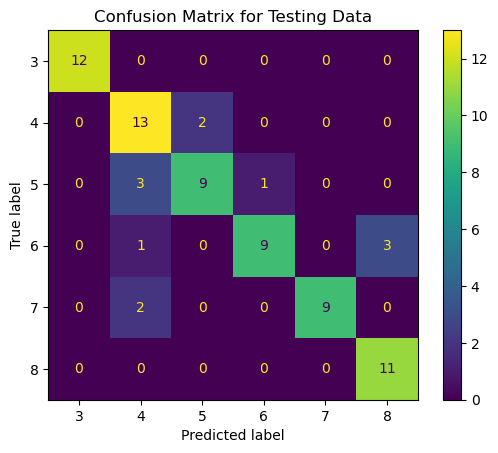

In [ ]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data\n")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data\n")
plt.title("Confusion Matrix for Testing Data")
plt.show()

In [ ]:
import pickle

# save models
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))
pickle.dump(multi_logreg, open('multinomial_logistic_regression_model.pkl', 'wb'))
pickle.dump(gnb, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm, open('support_vector_machine_model.pkl', 'wb'))